In [1]:
import os
from bs4 import BeautifulSoup

In [2]:
files = os.listdir("data/dumps")

In [3]:
data = []
for file in files:

    html_doc = open(f"data/dumps/{file}").read()

    soup = BeautifulSoup(html_doc, 'html.parser')
    rows = soup.find("tbody").find_all('tr')
    
    category = file.replace(".html","") 

    for row in rows: 
        td = row.find_all("td")
        index = td[0].get_text()
        name = td[1].get_text()
        symbol = td[2].get_text() 
        percentage = td[3].get_text().split("%")[0]

        record = dict(index=index, name=name, symbol=symbol, percentage=percentage, category=category)
    
        data.append(record)

In [4]:
import pandas as pd

In [5]:
pd.DataFrame(data).to_csv("data/stocks.csv",index=False)

In [6]:
df = pd.read_csv("data/stocks.csv")

In [7]:
df.head()

,index,name,symbol,percentage,category
0,1,Unitedhealth Group Inc,UNH,8.902782,DIA
1,2,Microsoft Corp,MSFT,6.882032,DIA
2,3,Goldman Sachs Group Inc,GS,6.569872,DIA
3,4,Home Depot Inc,HD,6.194837,DIA
4,5,Caterpillar Inc,CAT,5.360532,DIA


In [8]:
len(df)

734

In [9]:
len(df["category"].unique())

4

In [10]:
len(df["symbol"].unique())

519

In [11]:
import json

In [12]:
json.dump(df['symbol'].unique().tolist(),open('data/symbols.json','w'))

In [13]:
json.dump(df['category'].unique().tolist(), open('data/mutual_funds.json','w'))

### Downloading data from Yahoo

Yahoo Finance has a publicly available REST-API with limited functionaly.
The REST-API requires the following arguments to download data: "symbol", "period1", "period2", "interval".

period1 = 1641016800 (2022-01-01 00:00:00 UTC)
period2 = 1708495200 (2024-03-20 00:00:00 UTC)
interval = 1d 

Using `jq` a command-line utility I can create a script for download data from Yahoo's REST-API. 

```bash 
go-stock-price-prediction -symbol $symbol -period1 $period1 -period2 $period2 -interval 1d
```



In [14]:
indexFunds = df['category'].unique().tolist()

In [15]:
## Visualizations 

In [16]:
import matplotlib.pyplot as plt
import numpy as np

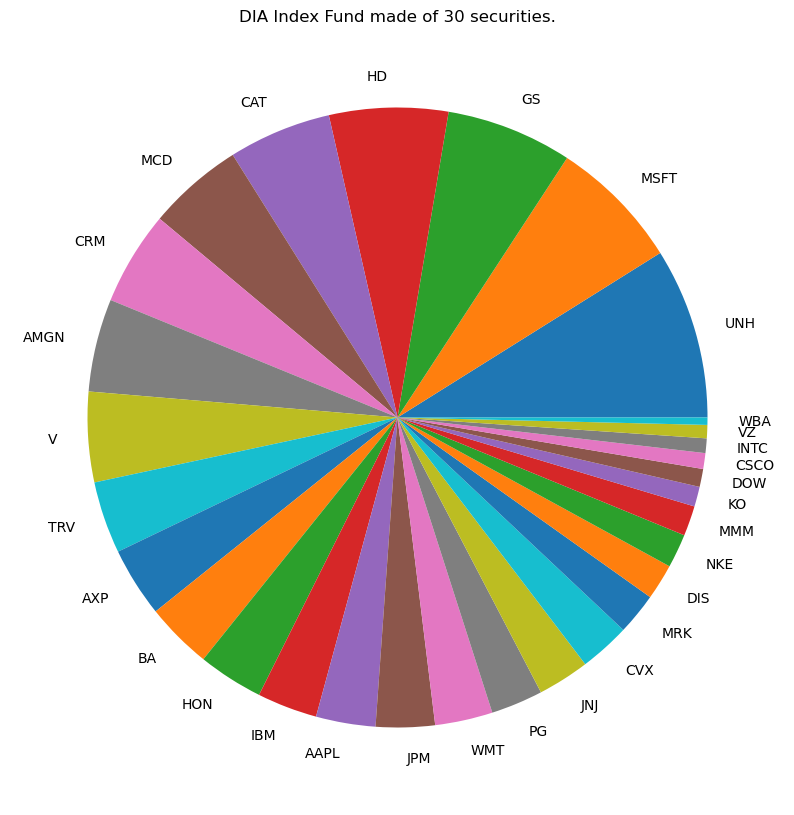

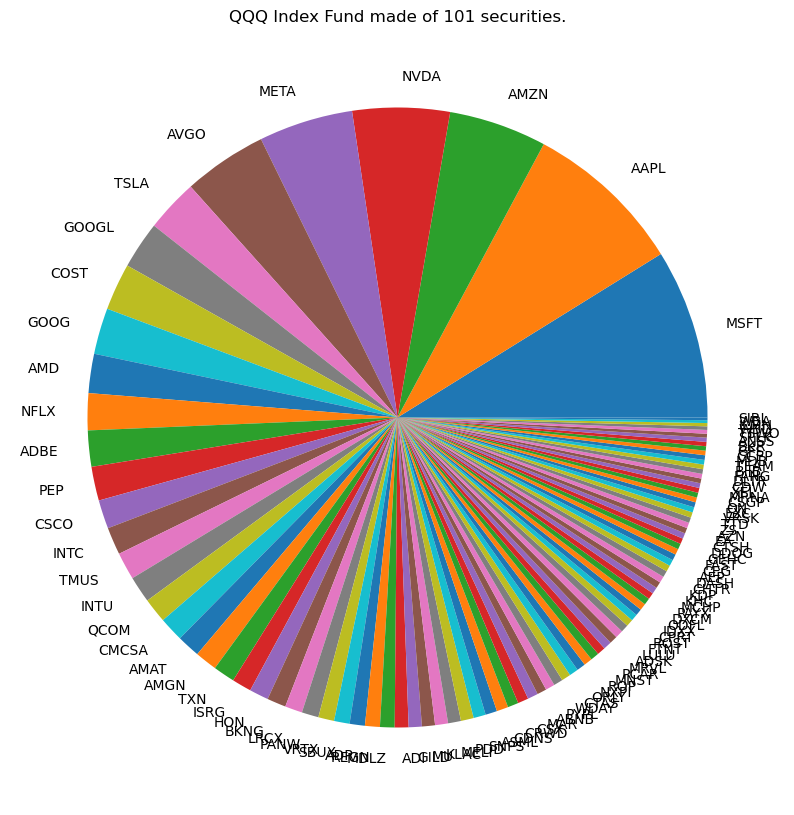

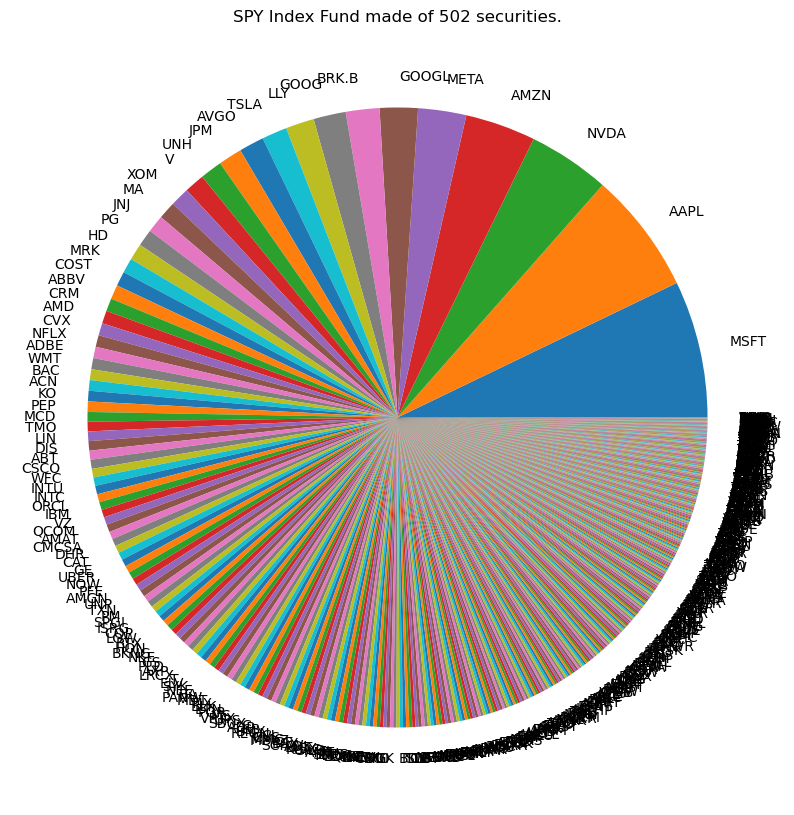

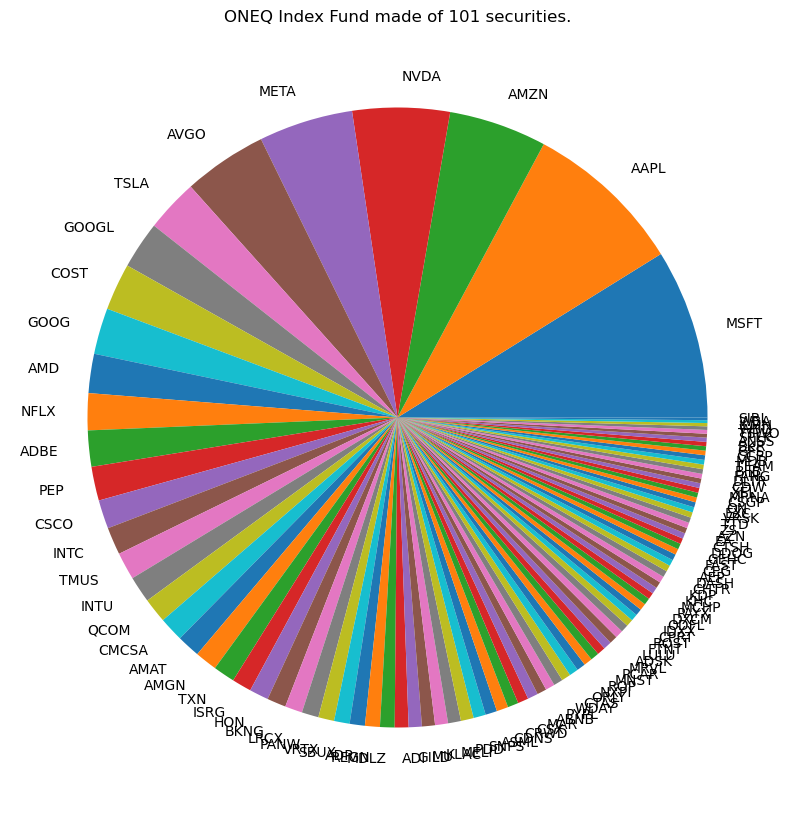

In [17]:
for indexFund in indexFunds:
    try: 
        plt.figure(figsize=(10, 500))
    
        x = df[df['category']==indexFund]['percentage'].tolist()
        labels = df[df['category']==indexFund]['symbol'].tolist()

        plt.pie(x, labels = labels,labeldistance=1.1)
        
        plt.title(label=f"{indexFund} Index Fund made of {len(labels)} securities.")
        plt.show()
    except Exception as err: 
        print(f'error: {err}')

In [18]:
df.head()

,index,name,symbol,percentage,category
0,1,Unitedhealth Group Inc,UNH,8.902782,DIA
1,2,Microsoft Corp,MSFT,6.882032,DIA
2,3,Goldman Sachs Group Inc,GS,6.569872,DIA
3,4,Home Depot Inc,HD,6.194837,DIA
4,5,Caterpillar Inc,CAT,5.360532,DIA


In [19]:
matrix = df.pivot_table(values='percentage',index='symbol',columns='category').dropna(axis=0)

In [20]:
matrix

category,DIA,ONEQ,QQQ,SPY
symbol,,,,
AAPL,3.102117,8.339,8.339,6.33
AMGN,4.844025,1.157,1.157,0.36
CSCO,0.824908,1.496,1.496,0.47
HON,3.399070,1.000,1.000,0.31
INTC,0.760664,1.432,1.432,0.44
MSFT,6.882032,8.841,8.841,7.13
WBA,0.381187,0.147,0.147,0.04


In [31]:
matrix.describe()

category,DIA,ONEQ,QQQ,SPY
count,7.000000,7.000000,7.000000,7.000000
mean,2.884858,3.201714,3.201714,2.154286
std,2.420445,3.710217,3.710217,3.137434
min,0.381187,0.147000,0.147000,0.040000
25%,0.792786,1.078500,1.078500,0.335000
50%,3.102117,1.432000,1.432000,0.440000
75%,4.121548,4.917500,4.917500,3.400000
max,6.882032,8.841000,8.841000,7.130000


In [21]:
matrix.columns.tolist()

['DIA', 'ONEQ', 'QQQ', 'SPY']

In [22]:
matrix.index.tolist()

['AAPL', 'AMGN', 'CSCO', 'HON', 'INTC', 'MSFT', 'WBA']

In [23]:
matrix.sum()

category
DIA     20.194003
ONEQ    22.412000
QQQ     22.412000
SPY     15.080000
dtype: float64

In [24]:
df.groupby('category')['percentage'].sum()

category
DIA      99.972878
ONEQ    100.000000
QQQ     100.000000
SPY      99.750000
Name: percentage, dtype: float64

In [25]:
df.groupby('category')['percentage'].sum() - matrix.sum()

category
DIA     79.778875
ONEQ    77.588000
QQQ     77.588000
SPY     84.670000
dtype: float64